In [ ]:
#!pip install tweepy
#!pip install spacy
#!pip install hatesonar
#!pip install -U scikit-learn
#!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 883 kB 17.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 19.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=03daa27fdf0f9a2e0dcdb755d8d9d7bb491d1afcf908b7aae0b37c4df22d9aed
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import networkx as nx
import itertools
import os
import tweepy as tw #for accessing Twitter API

#For Preprocessing
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem.porter import *
import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")
from pprint import pprint


# For Building the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
from gensim.utils import simple_preprocess
import gensim
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
# your Twitter API key and API secret
my_api_key = "------------------"
my_api_secret = "------------------------------"
access_token= '-----------------------------------------'
access_token_secret= '----------------------------------------'

# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_query = "#workfromhome -filter:retweets"

In [ ]:
# Define the search term and the date_since date as variables
search_words = "#workfromhome"
date_since = "2018-11-16"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items()
tweets

In [ ]:
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)

In [ ]:
print("Total Tweets fetched:", len(tweets_copy))
#print(tweets_copy)

Total Tweets fetched: 2830


In [ ]:
tweets_df = pd.DataFrame()
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)
# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,TDL,,Part of the TDL Cooperative. Non-Political Pro...,False,2022-08-13 06:23:33,Make Your First 500 Dollars Online: If you nev...,[workfromhome],dlvr.it
1,MagicNiclus,"Bordeaux, France",Developer,False,2022-08-13 06:22:22,RT @WeSabio: 🎉Chris is a tech consultant at Bo...,None,retweet_bot_one
2,Women Who Rule!,,A friendly bot who re/tweets (infrequently) th...,False,2022-08-13 06:20:14,RT @Happy_N_Smiling: Preparing Your #Accountin...,"[Accounting, Resume, SMBs, Workflow, Revenue]",WomenInExcellence
3,Product Management - Happy and Smiling,remote,"Happy, healthy and smiling remote work.\nEngin...",False,2022-08-13 06:20:09,Preparing Your #Accounting #Resume For #SMBs\n...,"[Accounting, Resume, SMBs, Workflow, Revenue]",Planable
4,Sabio Coding Bootcamp,WorldWide,Sabio is an innovative software-engineering tr...,False,2022-08-13 06:19:02,🎉Chris is a tech consultant at Booze Allen tha...,None,Buffer


In [ ]:
print(tweets_df.shape)
df=tweets_df
df['text'] = df['text'].apply(str)
df.drop_duplicates(subset=['text'], keep='first',inplace=True)
df.shape

(2830, 8)


(2294, 8)

In [ ]:
count=df['text'].str.split().str.len()
count.index=count.index.astype(str)+' words:'
count.sort_index(inplace=True)

In [ ]:
print("Total Number of words : ",count.sum()," words")

Total Number of words :  52379  words


In [ ]:
print("Mean number of words per tweet : ",round(count.mean(),2)," words")

Mean number of words per tweet :  22.83  words


In [ ]:
df["tweet_length"]=df["text"].str.len()
print("Total length of the dataset is : ",df.tweet_length.sum()," Characters")

Total length of the dataset is :  434153  Characters


In [ ]:
print("Mean length of a tweet is : ",round(df.tweet_length.mean(),0)," Characters")
df=df.drop(['tweet_length'],axis=1)

Mean length of a tweet is :  189.0  Characters


In [ ]:
# REMOVE '@USER'
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
  
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet
df['tidy_tweet'] = np.vectorize(remove_users)(df['text'],"@ [\w]*", "@[\w]*")
df['tidy_tweet'].head(3)

0    Make Your First 500 Dollars Online: If you nev...
1    RT : 🎉Chris is a tech consultant at Booze Alle...
2    RT : Preparing Your #Accounting #Resume For #S...
Name: tidy_tweet, dtype: object

In [ ]:
# NORMALIZATION
df['tidy_tweet'] = df['tidy_tweet'].str.lower()
df['tidy_tweet'].head(3)

0    make your first 500 dollars online: if you nev...
1    rt : 🎉chris is a tech consultant at booze alle...
2    rt : preparing your #accounting #resume for #s...
Name: tidy_tweet, dtype: object

In [ ]:
# REMOVE HASHTAGS
df['hashtags'] = df['tidy_tweet'].apply(lambda twt : re.findall(r"# (\w+)", twt))
d = Counter(df.hashtags.sum())
df_hashtags = pd.DataFrame([d]).T
df_hashtags.columns = ['freq']
df_hashtags.freq.sum()
df_hashtags.sort_values(by=['freq'], ascending=False, inplace=True)
# We drop '#workfromHome' and 'is' hashtags as these were the searching filters
df_hashtags = df_hashtags.drop(df_hashtags[df_hashtags.index.values=='workfromhome'].index)
df_hashtags = df_hashtags.drop(df_hashtags[df_hashtags.index.values=='is'].index)

Among 53.939 Tweets, 15557 Hashtags were used.


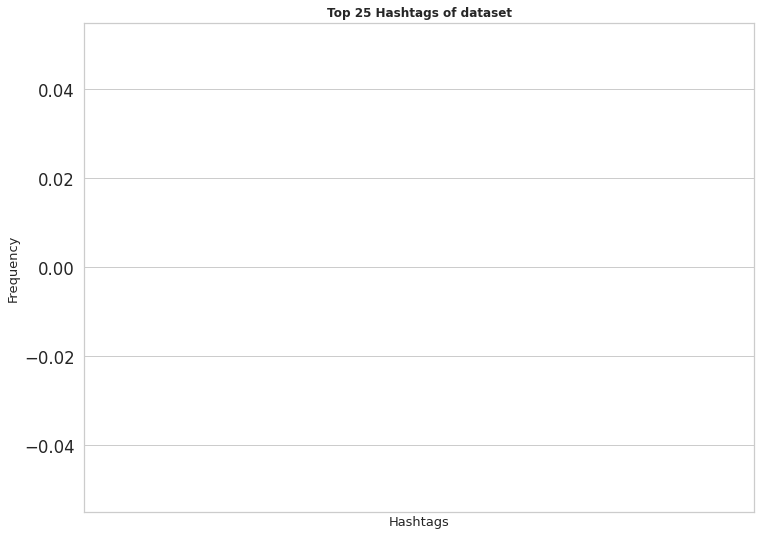

In [ ]:
labels = df_hashtags.head(25).index.values.tolist()
freq = df_hashtags['freq'].head(25).values.tolist()
index = np.arange(len(freq))

print("Among 53.939 Tweets, 15557 Hashtags were used.")
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Hashtags', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Hashtags of dataset', fontsize=12, fontweight="bold")
plt.show()

In [ ]:
df = df.drop(['hashtags'], axis=1)

In [ ]:
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [ ]:
df['tidy_tweet'] = np.vectorize(remove_hashtags)(df['tidy_tweet'], "# [\w]*", "#[\w]*")

In [ ]:
# REMOVE LINKS
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link
df['tidy_tweet'] = np.vectorize(remove_links)(df['tidy_tweet'])

In [ ]:
# REMOVE Punctuations, Numbers, and Special Characters
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# REMOVE SHORT WORDS
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
# TOKENIZATION
def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  
df['tidy_tweet_tokens'] = list(tokenize(df['tidy_tweet']))

In [ ]:
# Prepare Stop Words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'religions',     'pic','twitt',])
# REMOVE STOPWORDS
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word    not in stop_words] for tweet in tweets]
df['tokens_no_stop'] = remove_stopwords(df['tidy_tweet_tokens'])

In [ ]:
# REMOVE TWEETS LESS THAN 3 TOKENS
df['length'] = df['tokens_no_stop'].apply(len)
df = df.drop(df[df['length']<3].index)
df = df.drop(['length'], axis=1)
print(df.shape)
df.reset_index(drop=True, inplace=True)

(2171, 10)


WordCloud

In [ ]:
# Join the tweet back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

In [ ]:
df['no_stop_joined'] = df.apply(rejoin_words, axis=1)

In [ ]:
all_words = ' '.join([text for text in df['no_stop_joined']])

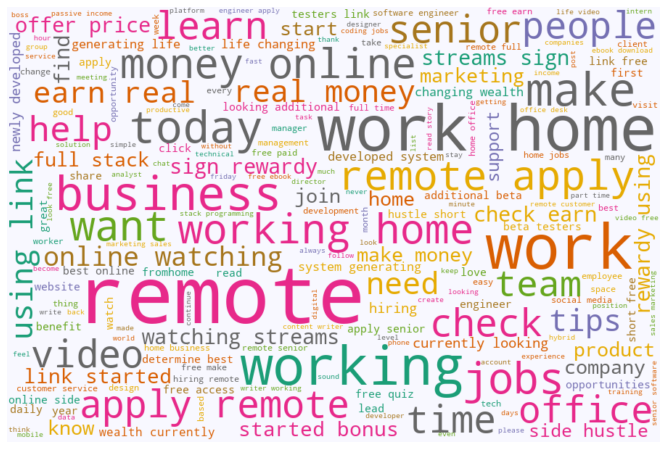

In [ ]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Cleaning Effects - Length of tweets

In [ ]:
df["tweet_length"] = df["text"].str.len()
df["cleaned_tweet_length"] = df["no_stop_joined"].str.len()
df_lengths = df[['tweet_length', 'cleaned_tweet_length']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


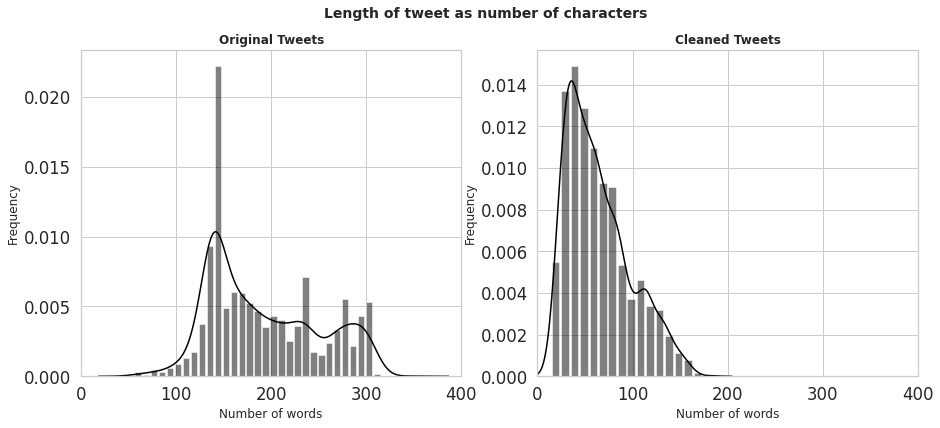

In [ ]:
x1 = df_lengths.tweet_length
x2 = df_lengths.cleaned_tweet_length
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of characters', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x1, color="black", label="No. Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="black", label="No. Words", bins=17, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

plt.show()

Cleaning Effects - Number of Words

In [ ]:
df["tweet_words"] = df['text'].str.split().str.len()
df["cleaned_tweet_words"] = df["no_stop_joined"].str.split().str.len()
df_lengths = df[['tweet_words', 'cleaned_tweet_words']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


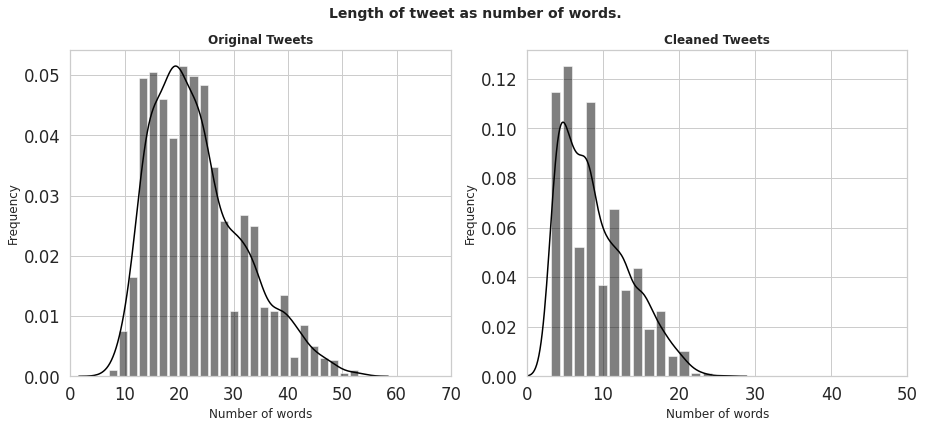

In [ ]:
x_1 = df_lengths.tweet_words
x_2 = df_lengths.cleaned_tweet_words
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of words.', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x_1, color="black", label="No. Words", bins=25, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,70])



# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="black", label="No. Words", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,50])

plt.show()

In [ ]:
df = df.drop(['tweet_length', 'cleaned_tweet_length', 'tweet_words', 'cleaned_tweet_words'], axis=1)

Top 25 Most frequent Words

In [ ]:
word_freq = pd.Series(np.concatenate([x.split() for x in df.no_stop_joined])).value_counts()

In [ ]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

Unique words: 3784


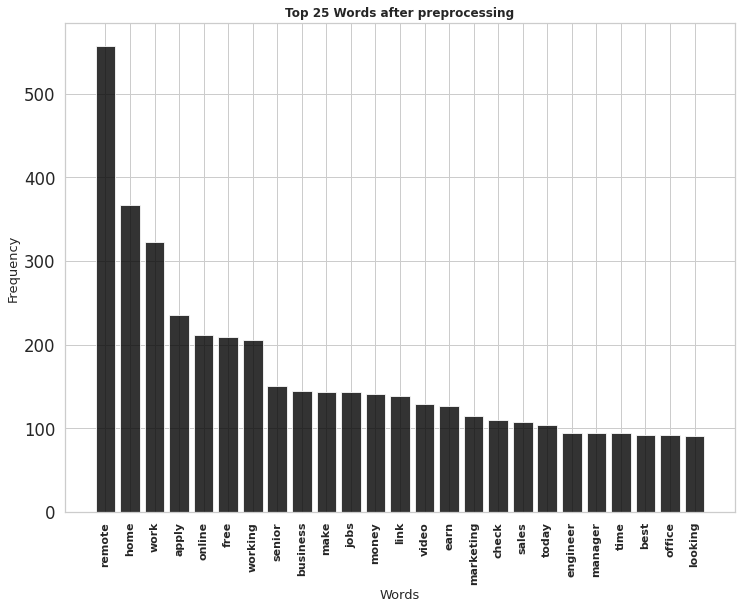

In [ ]:
label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

In [ ]:
df.to_pickle('pre-processed.pkl')

### Sentiment_Analysis

In [ ]:
df = pd.read_pickle('pre-processed.pkl')

In [ ]:
print("Before : ",df.shape)
df = df.drop(['tidy_tweet','tidy_tweet_tokens','no_stop_joined'], axis=1)
print("After : ",df.shape)
df.info()

Before :  (2171, 11)
After :  (2171, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         2171 non-null   object        
 1   user_location     2171 non-null   object        
 2   user_description  2171 non-null   object        
 3   user_verified     2171 non-null   bool          
 4   date              2171 non-null   datetime64[ns]
 5   text              2171 non-null   object        
 6   source            2171 non-null   object        
 7   tokens_no_stop    2171 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(6)
memory usage: 121.0+ KB


In [ ]:
# Create an object of Vader Sentiment Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [ ]:
negative = []
neutral = []
positive = []
compound = []

In [ ]:
def sentiment_scores(df, negative, neutral, positive, compound):
    for i in df['text']:
        sentiment_dict = vader_analyzer.polarity_scores(i)
        negative.append(sentiment_dict['neg'])
        neutral.append(sentiment_dict['neu'])
        positive.append(sentiment_dict['pos'])
        compound.append(sentiment_dict['compound'])

In [ ]:
sentiment_scores(df, negative, neutral, positive, compound)

In [ ]:
df["negative"] = negative
df["neutral"] = neutral
df["positive"] = positive
df["compound"] = compound

In [ ]:
# Fill the overall sentiment with encoding:
# (-1)Negative, (0)Neutral, (1)Positive
sentiment = []
for i in df['compound']:
    if i >= 0.05 : 
        sentiment.append(1)
  
    elif i <= - 0.05 : 
        sentiment.append(-1) 
        
    else : 
        sentiment.append(0)
df['sentiment'] = sentiment

In [ ]:
neg_tweets = df.sentiment.value_counts()[-1]
neu_tweets = df.sentiment.value_counts()[0]
pos_tweets = df.sentiment.value_counts()[1]

### **Number of tweets by sentiment**
Pie Chart

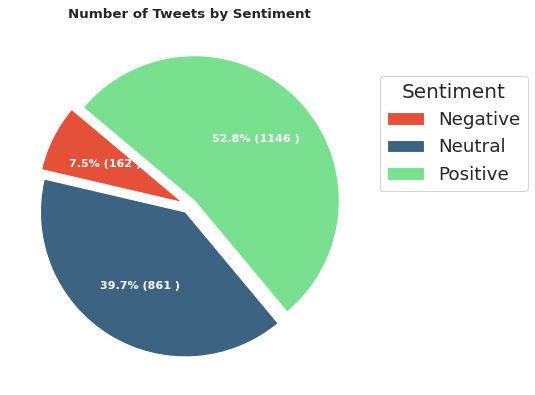

In [ ]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.sentiment.value_counts()[-1], df.sentiment.value_counts()[0], df.sentiment.value_counts()[1]]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Tweets by Sentiment", fontsize=12, fontweight="bold")
plt.show()

Histogram

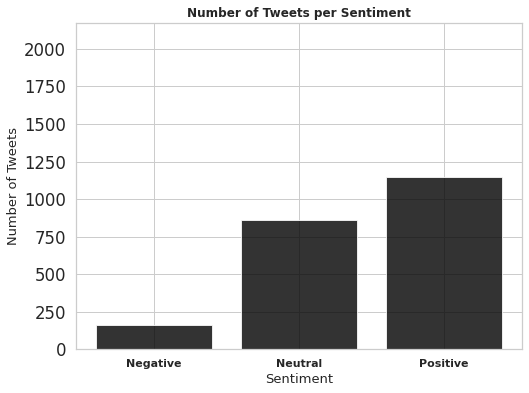

In [ ]:
labels = ['Negative', 'Neutral', 'Positive']
freq = [df.sentiment.value_counts()[-1], df.sentiment.value_counts()[0], df.sentiment.value_counts()[1]]
index = np.arange(len(freq))

plt.figure(figsize=(8,6))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11, fontweight="bold") 
plt.title('Number of Tweets per Sentiment', fontsize=12, fontweight="bold")
plt.ylim(0, len(df['text']))
plt.show()

Density Plot of Overall compound score

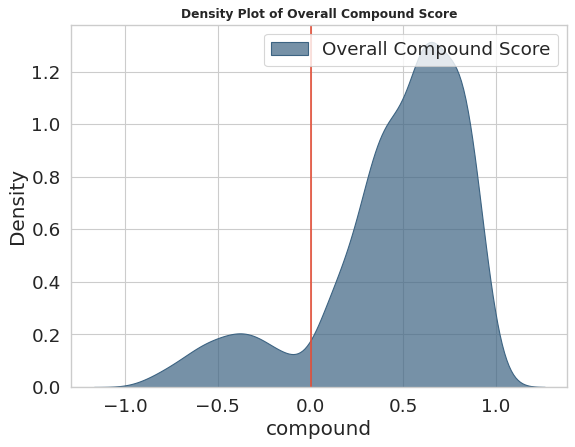

In [ ]:
# We remove the neutral compound scores to compare the negative and positive tweets
data = df[(df["sentiment"]!=0)]
# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(data["compound"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

### Word Cloud of Positive and Negative Tweets
Lemmatization

In [ ]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = lemmatization(df['tokens_no_stop'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
df.drop(['tokens_no_stop'], axis=1, inplace=True)

In [ ]:
df_pos = df[df['sentiment']==1]
df_neg = df[df['sentiment']==(-1)]

In [ ]:
df_pos.head()

,user_name,user_location,user_description,user_verified,date,text,source,negative,neutral,positive,compound,sentiment,lemmatized
0,TDL,,Part of the TDL Cooperative. Non-Political Pro...,False,2022-08-13 06:23:33,Make Your First 500 Dollars Online: If you nev...,dlvr.it,0.000,0.895,0.105,0.2500,1,"[make, first, dollar, online, never, make, mon..."
1,MagicNiclus,"Bordeaux, France",Developer,False,2022-08-13 06:22:22,RT @WeSabio: 🎉Chris is a tech consultant at Bo...,retweet_bot_one,0.000,0.848,0.152,0.5826,1,"[consultant, booze, allen, thank, learn, tech]"
4,Sabio Coding Bootcamp,WorldWide,Sabio is an innovative software-engineering tr...,False,2022-08-13 06:19:02,🎉Chris is a tech consultant at Booze Allen tha...,Buffer,0.000,0.903,0.097,0.5826,1,"[consultant, booze, allen, thank, learn, fromh..."
9,GVA Marideth Espliguera,,"I am Marideth Kezzia Espliguera, a registered ...",False,2022-08-13 06:04:00,"""For every task you DON'T like doing, there is...",TweetDeck,0.076,0.788,0.137,0.4033,1,"[task, virtual, assistant, hire]"
11,EU Remote Jobs,Everywhere,Full-time remote jobs within the best fully di...,False,2022-08-13 06:00:35,Clarisights is #hiring a Customer Success Mana...,Buffer,0.000,0.850,0.150,0.5719,1,"[clarisight, customer, success, manager, strat..."


WordCloud

In [ ]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [ ]:
all_words_pos = ' '.join([text for text in df_pos.apply(rejoin_words, axis=1)])
all_words_neg = ' '.join([text for text in df_neg.apply(rejoin_words, axis=1)])

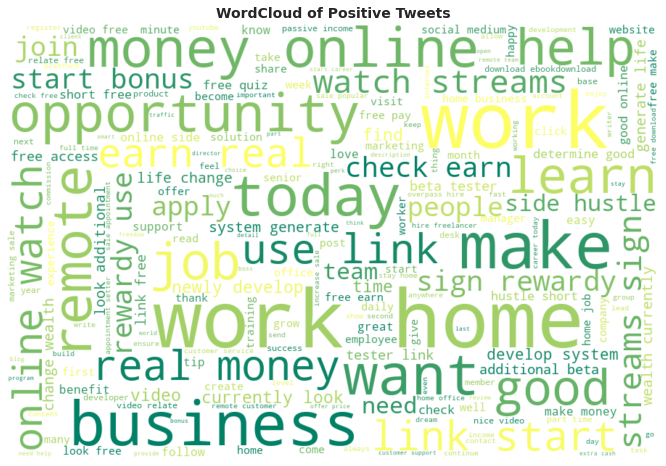

In [ ]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='white', 
                      max_words=200,colormap='summer').generate(all_words_pos)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Positive Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

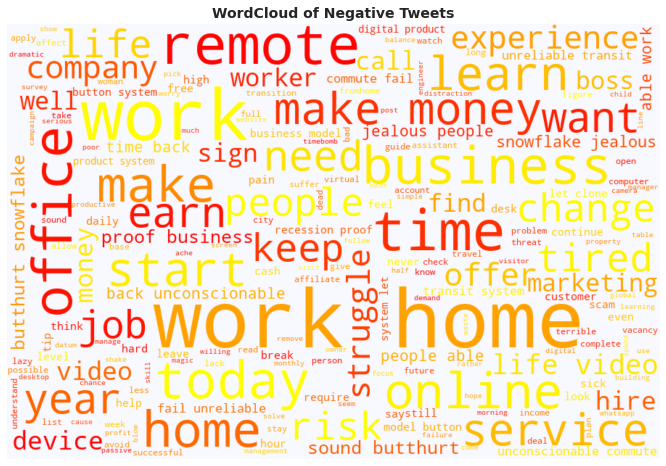

In [ ]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='autumn').generate(all_words_neg)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Negative Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Compound Score Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


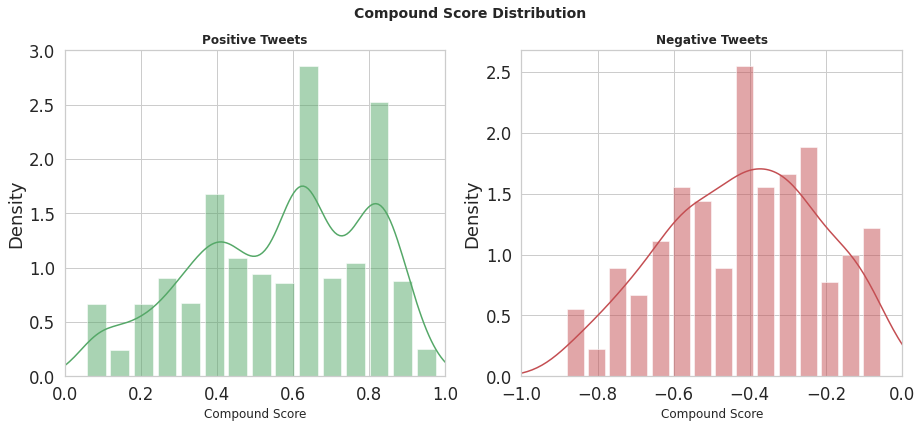

In [ ]:
x1 = df_pos['compound']
x2 = df_neg['compound']
plt.figure(figsize=(15,6))
plt.suptitle('Compound Score Distribution', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)

sns.distplot(x1, color="g", bins=15, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title('Positive Tweets',fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([0,1])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="r", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Negative Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([-1,0])

plt.show()

In [ ]:
x1.describe()

count    1147.000000
mean        0.567009
std         0.226771
min         0.051600
25%         0.401200
50%         0.616600
75%         0.778300
max         0.980400
Name: compound, dtype: float64

In [ ]:
x2.describe()

count    162.000000
mean      -0.419680
std        0.203469
min       -0.886000
25%       -0.557400
50%       -0.421500
75%       -0.273200
max       -0.051600
Name: compound, dtype: float64

Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


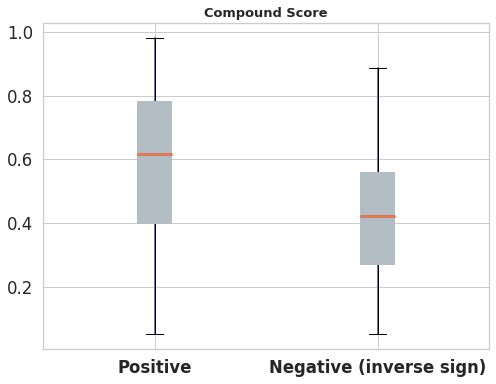

In [ ]:
data_to_plot = [x1,(x2)*-1]
# Box-plot
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot, patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#b2bec3', linewidth=2)
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#e17055', linewidth=3)
plt.boxplot(data_to_plot)
plt.title('Compound Score', fontsize=13, fontweight='bold')
ax.set_xticklabels(['Positive', 'Negative (inverse sign)'], fontweight='bold')
plt.show()

10 Most Positive and Negative Tweets

In [ ]:
# 10 Most positive Tweets
df_pos.sort_values('compound', inplace=True, ascending=False)
df_pos.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_pos.head(5)

,user_name,user_location,user_description,user_verified,date,text,source,negative,neutral,positive,compound,sentiment,lemmatized
0,WEM APAC,Melbourne,"We empower you to build, deploy and maintain a...",False,2022-08-12 09:52:28,We're happy to welcome new talents joining our...,Twitter Web App,0.0,0.546,0.454,0.9804,1,"[happy, welcome, talent, join, foster, culture..."
1,Melanie,"Manitoba, Canada","I am a mama, a musician, and a student. I work...",False,2022-08-11 23:05:27,Love love love these #scentsy warmers!!! Visit...,Twitter for Android,0.0,0.432,0.568,0.9499,1,"[love, love, love, warmer, visit, link, grab]"
2,Cyberbacker Careers,,"To empower growth-minded, emerging business ow...",False,2022-08-12 06:00:01,TOP 3 REASONS TO FOLLOW US! \n\n1. We offer wo...,Twitter Web App,0.0,0.623,0.377,0.9480,1,"[reason, follow, offer, work, home, opportunit..."
3,Cheno Thong,,Managing Director\nWEM APAC,False,2022-08-12 12:15:39,RT @WemApac: We're happy to welcome new talent...,Twitter for Android,0.0,0.507,0.493,0.9477,1,"[happy, welcome, talent, join, foster, culture..."
4,Dan Hubbard,"London, England",Casting Director. Liverpool Fanatic. Only real...,False,2022-08-12 21:41:17,RT @chloeepartridge: A LOVE LETTER TO SELF TAP...,Twitter for iPhone,0.0,0.534,0.466,0.9419,1,"[love, letter, self, tape, love, chloe, share]"


In [ ]:
# 10 Most Negative Tweets
df_neg.sort_values('compound', inplace=True)
df_neg.reset_index(drop=True).head(5)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,user_name,user_location,user_description,user_verified,date,text,source,negative,neutral,positive,compound,sentiment,lemmatized
0,LivePowerfully,USA,Start An #Online Business with High-Ticket Com...,False,2022-08-12 10:45:23,New “Affiliate Domination Formula” Gives You A...,IFTTT,0.295,0.661,0.044,-0.8860,-1,"[affiliate, domination, formula, give, unfair,..."
1,Jennifer Murray,Fremont,I like to post the latest videos on #RemoteWor...,False,2022-08-12 13:39:06,Online data entry job Work from home | Scam ? ...,dlvr.it,0.375,0.625,0.000,-0.8402,-1,"[online, data, entry, work, home, scam, avoid,..."
2,The Librarian,Global,"Built by VAs for VAs. Resources, free training...",False,2022-08-13 00:00:01,RT @VACafeOnline: I'd rather do what I love an...,SocialBee.io v2,0.344,0.547,0.109,-0.8398,-1,"[rather, love, poor, force, hate, still, poor,..."
3,Laura,Finland,"ADHD inattentive, dg 12/2020 🌺\nTranslator, te...",False,2022-08-13 01:47:04,So tired of people saying that it's lazy to wo...,Twitter Web App,0.187,0.813,0.000,-0.8357,-1,"[tired, people, say, lazy, work, home, less, p..."
4,Home Office Outlet,Australia,Home office outlet is the best destination for...,False,2022-08-12 02:16:14,And when someone starts working at home but do...,Missinglettr,0.193,0.807,0.000,-0.8352,-1,"[start, work, home, care, routine, output, rea..."


Trying and Testing on specific Tweets

In [ ]:
df.head(5)

,user_name,user_location,user_description,user_verified,date,text,source,negative,neutral,positive,compound,sentiment,lemmatized
0,TDL,,Part of the TDL Cooperative. Non-Political Pro...,False,2022-08-13 06:23:33,Make Your First 500 Dollars Online: If you nev...,dlvr.it,0.0,0.895,0.105,0.2500,1,"[make, first, dollar, online, never, make, mon..."
1,MagicNiclus,"Bordeaux, France",Developer,False,2022-08-13 06:22:22,RT @WeSabio: 🎉Chris is a tech consultant at Bo...,retweet_bot_one,0.0,0.848,0.152,0.5826,1,"[consultant, booze, allen, thank, learn, tech]"
2,Women Who Rule!,,A friendly bot who re/tweets (infrequently) th...,False,2022-08-13 06:20:14,RT @Happy_N_Smiling: Preparing Your #Accountin...,WomenInExcellence,0.0,1.000,0.000,0.0000,0,"[prepare, accounting, system, cost, center, re..."
3,Product Management - Happy and Smiling,remote,"Happy, healthy and smiling remote work.\nEngin...",False,2022-08-13 06:20:09,Preparing Your #Accounting #Resume For #SMBs\n...,Planable,0.0,1.000,0.000,0.0000,0,"[prepare, accounting, system, cost, center, re..."
4,Sabio Coding Bootcamp,WorldWide,Sabio is an innovative software-engineering tr...,False,2022-08-13 06:19:02,🎉Chris is a tech consultant at Booze Allen tha...,Buffer,0.0,0.903,0.097,0.5826,1,"[consultant, booze, allen, thank, learn, fromh..."


In [ ]:
df.text[46]

'Check out @rewardy_app where you can earn real money online by watching streams!\n\nSign up to Rewardy using my link to get started with a bonus!\nhttps://t.co/3bfRt8KRnN\n\n #win #gift #card #steamwallet #deals #workfromhome #makemoneyonline'

In [ ]:
tweets=df.text[46]

In [ ]:
sentiment_dict = vader_analyzer.polarity_scores(tweets) 
      
print("Overall sentiment is : ", sentiment_dict) 
print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
print("Sentence Overall Rated As", end = " ")
# decide sentiment as positive, negative and neutral 
if sentiment_dict['compound'] >= 0.05 : 
    print("Positive") 
elif sentiment_dict['compound'] <= - 0.05 : 
    print("Negative")  
else : 
    print("Neutral") 

Overall sentiment is :  {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.6229}
sentence was rated as  0.0 % Negative
sentence was rated as  88.7 % Neutral
sentence was rated as  11.3 % Positive
Sentence Overall Rated As Positive


Normalization used by VADER
 
Save Results as a Dataframe

In [ ]:
df.drop(['text', 'lemmatized'], axis=1, inplace=True)

In [ ]:
df.to_pickle('sentiment_analysis_vader_results.pkl')

### Topic Modelling - Gensim.ipynb

In [ ]:
df = pd.read_pickle('pre-processed.pkl')

In [ ]:
df.shape

(2171, 11)

In [ ]:
df.head()

,user_name,user_location,user_description,user_verified,date,text,source,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined
0,TDL,,Part of the TDL Cooperative. Non-Political Pro...,False,2022-08-13 06:23:33,Make Your First 500 Dollars Online: If you nev...,dlvr.it,make your first dollars online never made mone...,"[make, your, first, dollars, online, never, ma...","[make, first, dollars, online, never, made, mo...",make first dollars online never made money onl...
1,MagicNiclus,"Bordeaux, France",Developer,False,2022-08-13 06:22:22,RT @WeSabio: 🎉Chris is a tech consultant at Bo...,retweet_bot_one,chris tech consultant booze allen thanks sabio...,"[chris, tech, consultant, booze, allen, thanks...","[chris, tech, consultant, booze, allen, thanks...",chris tech consultant booze allen thanks sabio...
2,Women Who Rule!,,A friendly bot who re/tweets (infrequently) th...,False,2022-08-13 06:20:14,RT @Happy_N_Smiling: Preparing Your #Accountin...,WomenInExcellence,preparing your accounting system cost centers ...,"[preparing, your, accounting, system, cost, ce...","[preparing, accounting, system, cost, centers,...",preparing accounting system cost centers read ...
3,Product Management - Happy and Smiling,remote,"Happy, healthy and smiling remote work.\nEngin...",False,2022-08-13 06:20:09,Preparing Your #Accounting #Resume For #SMBs\n...,Planable,preparing your accounting system cost centers ...,"[preparing, your, accounting, system, cost, ce...","[preparing, accounting, system, cost, centers,...",preparing accounting system cost centers read ...
4,Sabio Coding Bootcamp,WorldWide,Sabio is an innovative software-engineering tr...,False,2022-08-13 06:19:02,🎉Chris is a tech consultant at Booze Allen tha...,Buffer,chris tech consultant booze allen thanks sabio...,"[chris, tech, consultant, booze, allen, thanks...","[chris, tech, consultant, booze, allen, thanks...",chris tech consultant booze allen thanks sabio...


In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('make', 'first'),
 ('first', 'dollars'),
 ('dollars', 'online'),
 ('online', 'never'),
 ('never', 'made'),
 ('made', 'money'),
 ('money', 'online'),
 ('online', 'chance')]

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = Counter(bigrams)

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])

In [ ]:
len(bigram_counts)

10080

In [ ]:
bigram_df.head(25)

,bigram,count
0,"(work, home)",162
1,"(money, online)",67
2,"(remote, apply)",65
3,"(working, home)",62
4,"(real, money)",46
5,"(using, link)",45
6,"(earn, real)",44
7,"(online, watching)",44
8,"(watching, streams)",44
9,"(streams, sign)",44


Number of Bigrams Identified 25


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


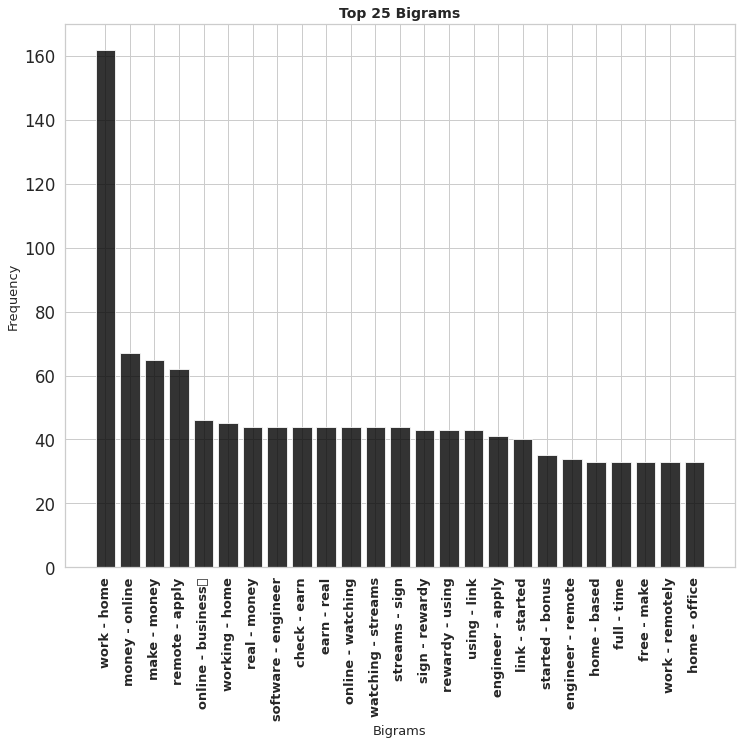

In [ ]:
bigram_label = ['work - home','money - online', 'make - money', 'remote - apply','online - business	','working - home','real - money','software - engineer','check - earn','earn - real',
                'online - watching','watching - streams','streams - sign','sign - rewardy','rewardy - using','using - link','engineer - apply','link - started','started - bonus',
                'engineer - remote','home - based','full - time','free - make','work - remotely','home - office']
bigram_freq = bigram_df['count'].head(25)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'black')
plt.xlabel('Bigrams', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, bigram_label, fontsize=13, rotation=90, fontweight="bold") 
plt.title('Top 25 Bigrams', fontsize=14, fontweight="bold")
plt.show()

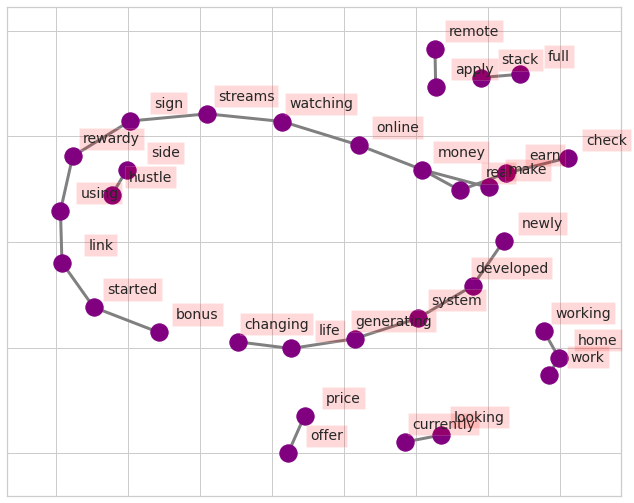

In [ ]:
#Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

Bigrams and Trigrams

In [ ]:
data = df.no_stop_joined.values.tolist()

In [ ]:
print(data[:1])

['make first dollars online never made money online chance']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(data))

print(data_words[:1])

[['make', 'first', 'dollars', 'online', 'never', 'made', 'money', 'online', 'chance']]


Make Bigrams and Trigrams

In [ ]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['paid', 'facebook', 'youtube', 'link']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

Lemmatization

In [ ]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))
df.head(10)

,user_name,user_location,user_description,user_verified,date,text,source,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,lemmatized
0,TDL,,Part of the TDL Cooperative. Non-Political Pro...,False,2022-08-13 06:23:33,Make Your First 500 Dollars Online: If you nev...,dlvr.it,make your first dollars online never made mone...,"[make, your, first, dollars, online, never, ma...","[make, first, dollars, online, never, made, mo...",make first dollars online never made money onl...,"[make, first, dollar, online, never, make, mon..."
1,MagicNiclus,"Bordeaux, France",Developer,False,2022-08-13 06:22:22,RT @WeSabio: 🎉Chris is a tech consultant at Bo...,retweet_bot_one,chris tech consultant booze allen thanks sabio...,"[chris, tech, consultant, booze, allen, thanks...","[chris, tech, consultant, booze, allen, thanks...",chris tech consultant booze allen thanks sabio...,"[consultant, booze, allen, thank, learn, tech]"
2,Women Who Rule!,,A friendly bot who re/tweets (infrequently) th...,False,2022-08-13 06:20:14,RT @Happy_N_Smiling: Preparing Your #Accountin...,WomenInExcellence,preparing your accounting system cost centers ...,"[preparing, your, accounting, system, cost, ce...","[preparing, accounting, system, cost, centers,...",preparing accounting system cost centers read ...,"[prepare, accounting, system, cost, center, re..."
3,Product Management - Happy and Smiling,remote,"Happy, healthy and smiling remote work.\nEngin...",False,2022-08-13 06:20:09,Preparing Your #Accounting #Resume For #SMBs\n...,Planable,preparing your accounting system cost centers ...,"[preparing, your, accounting, system, cost, ce...","[preparing, accounting, system, cost, centers,...",preparing accounting system cost centers read ...,"[prepare, accounting, system, cost, center, re..."
4,Sabio Coding Bootcamp,WorldWide,Sabio is an innovative software-engineering tr...,False,2022-08-13 06:19:02,🎉Chris is a tech consultant at Booze Allen tha...,Buffer,chris tech consultant booze allen thanks sabio...,"[chris, tech, consultant, booze, allen, thanks...","[chris, tech, consultant, booze, allen, thanks...",chris tech consultant booze allen thanks sabio...,"[consultant, booze, allen, thank, learn, fromh..."
5,PANUPONG HANGSO,,SCAMMER,False,2022-08-13 06:16:18,"RT @Special_Offerr: Get Paid To Use Facebook, ...",Twitter Web App,paid facebook twitter youtube link,"[paid, facebook, twitter, youtube, link]","[paid, facebook, youtube, link]",paid facebook youtube link,"[pay, facebook, youtube, link]"
6,Twitchi,,"Hey, I am a bot developed by @Gaurav_Khulway, ...",False,2022-08-13 06:16:14,RT @kitchensbythek2: Work from home in style #...,Twitchi-Twitter-Bot,work from home style withaview,"[work, from, home, style, withaview]","[work, home, style, withaview]",work home style withaview,"[work, home, style, withaview]"
7,kitchens_by_thekitchenfactory,Studio City,Kitchen Concierge for discriminating buyers. W...,False,2022-08-13 06:14:59,Work from home in style #homeoffice #workfromh...,Twitter for iPhone,work from home style withaview space design se...,"[work, from, home, style, withaview, space, de...","[work, home, style, withaview, space, design, ...",work home style withaview space design setup b...,"[work, home, style, withaview, space, design, ..."
8,remotejobs.ninja 🥋,USA,Remote jobs all over the worldwide #remotejobs...,False,2022-08-13 06:12:08,New Remote Job 🏆👇🏻\n\n Senior SEO Strategist S...,Revive Social App,remote senior strategist senior,"[remote, senior, strategist, senior]","[remote, senior, strategist, senior]",remote senior strategist senior,"[remote, senior, strategist, senior]"
9,GVA Marideth Espliguera,,"I am Marideth Kezzia Espliguera, a registered ...",False,2022-08-13 06:04:00,"""For every task you DON'T like doing, there is...",TweetDeck,every task like doing there virtual assistant ...,"[every, task, like, doing, there, virtual, ass...","[every, task, like, virtual, assistant, like, ...",every task like virtual assistant like hire,"[task, virtua

Dropping Duplicates

In [ ]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [ ]:
df['lemmatized_joined'] = df.apply(rejoin_words, axis=1)

In [ ]:
df = df.drop_duplicates(subset=['lemmatized_joined'], keep='first', inplace=False)

In [ ]:
df.shape

(1697, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 2170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_name          1697 non-null   object        
 1   user_location      1697 non-null   object        
 2   user_description   1697 non-null   object        
 3   user_verified      1697 non-null   bool          
 4   date               1697 non-null   datetime64[ns]
 5   text               1697 non-null   object        
 6   source             1697 non-null   object        
 7   tidy_tweet         1697 non-null   object        
 8   tidy_tweet_tokens  1697 non-null   object        
 9   tokens_no_stop     1697 non-null   object        
 10  no_stop_joined     1697 non-null   object        
 11  lemmatized         1697 non-null   object        
 12  lemmatized_joined  1697 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(11)
memory usage: 174.0+ 

Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
df['stemmed'] = df['lemmatized'].apply(lambda x : [stemmer.stem(y) for y in x])

In [ ]:
df.head()

,user_name,user_location,user_description,user_verified,date,text,source,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,lemmatized,lemmatized_joined,stemmed
0,TDL,,Part of the TDL Cooperative. Non-Political Pro...,False,2022-08-13 06:23:33,Make Your First 500 Dollars Online: If you nev...,dlvr.it,make your first dollars online never made mone...,"[make, your, first, dollars, online, never, ma...","[make, first, dollars, online, never, made, mo...",make first dollars online never made money onl...,"[make, first, dollar, online, never, make, mon...",make first dollar online never make money onli...,"[make, first, dollar, onlin, never, make, mone..."
1,MagicNiclus,"Bordeaux, France",Developer,False,2022-08-13 06:22:22,RT @WeSabio: 🎉Chris is a tech consultant at Bo...,retweet_bot_one,chris tech consultant booze allen thanks sabio...,"[chris, tech, consultant, booze, allen, thanks...","[chris, tech, consultant, booze, allen, thanks...",chris tech consultant booze allen thanks sabio...,"[consultant, booze, allen, thank, learn, tech]",consultant booze allen thank learn tech,"[consult, booz, allen, thank, learn, tech]"
2,Women Who Rule!,,A friendly bot who re/tweets (infrequently) th...,False,2022-08-13 06:20:14,RT @Happy_N_Smiling: Preparing Your #Accountin...,WomenInExcellence,preparing your accounting system cost centers ...,"[preparing, your, accounting, system, cost, ce...","[preparing, accounting, system, cost, centers,...",preparing accounting system cost centers read ...,"[prepare, accounting, system, cost, center, re...",prepare accounting system cost center read story,"[prepar, account, system, cost, center, read, ..."
3,Product Management - Happy and Smiling,remote,"Happy, healthy and smiling remote work.\nEngin...",False,2022-08-13 06:20:09,Preparing Your #Accounting #Resume For #SMBs\n...,Planable,preparing your accounting system cost centers ...,"[preparing, your, accounting, system, cost, ce...","[preparing, accounting, system, cost, centers,...",preparing accounting system cost centers read ...,"[prepare, accounting, system, cost, center, re...",prepare accounting system cost center read sto...,"[prepar, account, system, cost, center, read, ..."
4,Sabio Coding Bootcamp,WorldWide,Sabio is an innovative software-engineering tr...,False,2022-08-13 06:19:02,🎉Chris is a tech consultant at Booze Allen tha...,Buffer,chris tech consultant booze allen thanks sabio...,"[chris, tech, consultant, booze, allen, thanks...","[chris, tech, consultant, booze, allen, thanks...",chris tech consultant booze allen thanks sabio...,"[consultant, booze, allen, thank, learn, fromh...",consultant booze allen thank learn fromhome,"[consult, booz, allen, thank, learn, fromhom]"


In [ ]:
# Create Dictionary
id2word_stemmed = corpora.Dictionary(df['stemmed'])

In [ ]:
# Create Dictionary
id2word_lemma = corpora.Dictionary(df['tokens_no_stop'])
# Create Dictionary
id2word_tidy = corpora.Dictionary(df['tidy_tweet_tokens'])
print(id2word_stemmed)
print(id2word_lemma)
print(id2word_tidy)

Dictionary(2439 unique tokens: ['chanc', 'dollar', 'first', 'make', 'money']...)
Dictionary(3771 unique tokens: ['chance', 'dollars', 'first', 'made', 'make']...)
Dictionary(3840 unique tokens: ['chance', 'dollars', 'first', 'made', 'make']...)


In [ ]:
# Create Corpus
tweets_stemmed = df['stemmed']
df['stemmed'][1]

['consult', 'booz', 'allen', 'thank', 'learn', 'tech']

In [ ]:
df['text'][1]

'RT @WeSabio: 🎉Chris is a tech consultant at Booze Allen thanks to Sabio!!🎉 \n\nLearn how you can break into tech, too! ⬇️\n\nhttps://t.co/wvCoQ…'

In [ ]:
tweets_stemmed

0       [make, first, dollar, onlin, never, make, mone...
1              [consult, booz, allen, thank, learn, tech]
2       [prepar, account, system, cost, center, read, ...
3       [prepar, account, system, cost, center, read, ...
4           [consult, booz, allen, thank, learn, fromhom]
                              ...                        
2163    [beekeep, look, custom, engin, offer, competit...
2166    [love, boss, start, busi, work, home, live, dr...
2167                                   [need, work, home]
2168    [work, full, time, home, love, control, time, ...
2170                                          [scientist]
Name: stemmed, Length: 1697, dtype: object

In [ ]:
# Term Document Frequency
corpus_stemmed = [id2word_stemmed.doc2bow(tweet) for tweet in tweets_stemmed]
print(len(corpus_stemmed))

1697


In [ ]:
print(corpus_stemmed[48])

[(209, 1), (210, 1), (211, 1)]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word_stemmed[id], freq) for id, freq in cp] for cp in corpus_stemmed[:3]]

[[('chanc', 1),
  ('dollar', 1),
  ('first', 1),
  ('make', 2),
  ('money', 1),
  ('never', 1),
  ('onlin', 2)],
 [('allen', 1),
  ('booz', 1),
  ('consult', 1),
  ('learn', 1),
  ('tech', 1),
  ('thank', 1)],
 [('account', 1),
  ('center', 1),
  ('cost', 1),
  ('prepar', 1),
  ('read', 1),
  ('stori', 1),
  ('system', 1)]]

Build the LDA Model

In [ ]:
# Build LDA model
lda_model_stemmed = gensim.models.ldamodel.LdaModel(corpus=corpus_stemmed,
                                           id2word=id2word_stemmed,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

View the Topics

In [ ]:
pprint(lda_model_stemmed.print_topics())
doc_lda_stemmed = lda_model_stemmed[corpus_stemmed]

[(0,
  '0.047*"look" + 0.026*"employe" + 0.023*"offer_pric" + 0.021*"give" + '
  '0.018*"modern" + 0.017*"alway" + 0.016*"incom" + 0.015*"gold" + '
  '0.014*"continu" + 0.013*"staff"'),
 (1,
  '0.076*"product" + 0.074*"engin" + 0.033*"program" + 0.030*"softwar" + '
  '0.027*"base" + 0.022*"appli" + 0.022*"boss" + 0.022*"keep" + 0.018*"manag" '
  '+ 0.016*"full_stack"'),
 (2,
  '0.142*"remot" + 0.089*"appli" + 0.079*"senior" + 0.060*"manag" + '
  '0.045*"develop" + 0.021*"custom" + 0.019*"part" + 0.017*"hybrid" + '
  '0.017*"daili" + 0.015*"digit"'),
 (3,
  '0.076*"market" + 0.060*"peopl" + 0.039*"help" + 0.035*"link" + '
  '0.023*"content" + 0.023*"offer" + 0.022*"follow" + 0.022*"use" + '
  '0.020*"write" + 0.019*"share"'),
 (4,
  '0.179*"work" + 0.120*"home" + 0.038*"offic" + 0.029*"desk" + 0.019*"team" + '
  '0.019*"support" + 0.015*"tip" + 0.012*"check" + 0.012*"writer" + '
  '0.012*"year"'),
 (5,
  '0.042*"want" + 0.035*"learn" + 0.027*"life" + 0.026*"sale" + 0.023*"lead" + '
  '0

Model Perplexity and Coherence Score

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_stemmed.log_perplexity(corpus_stemmed))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_stemmed = CoherenceModel(model=lda_model_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_lda_stemmed = coherence_model_lda_stemmed.get_coherence()
print('\nCoherence Score: ', coherence_lda_stemmed)


Perplexity:  -7.3107176018981725

Coherence Score:  0.4760394443574964


Visualize with pyLDAvis

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim_models.prepare(lda_model_stemmed, corpus_stemmed, id2word_stemmed)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.323449 -0.186159       1        1  17.159857
8      0.200473 -0.099483       2        1  11.931756
5      0.025249 -0.052893       3        1  11.656399
6      0.186271 -0.136038       4        1  11.282480
2     -0.034516  0.270724       5        1  10.229786
3     -0.005744 -0.042071       6        1   9.391095
9      0.023280  0.072813       7        1   7.599512
7     -0.015338 -0.026145       8        1   7.189853
0     -0.021317  0.027137       9        1   6.902309
1     -0.034910  0.172115      10        1   6.656953, topic_info=         Term        Freq       Total Category  logprob  loglift
29       work  416.000000  416.000000  Default  30.0000  30.0000
26       home  279.000000  279.000000  Default  29.0000  29.0000
35      remot  198.000000  198.000000  Default  28.0000  28.0000
50       busi  131.000000  131.000000  Default  27.0000  27.0000
45      appli  144.000000  144.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
287   protect    5.248838    5.986825  Topic10  -5.1471   2.5780
1795  practic    5.161810    5.899710  Topic10  -5.1639   2.5759
749   flexibl   10.100131   12.396452  Topic10  -4.4926   2.5046
45      appli   20.271899  144.044475  Topic10  -3.7959   0.7486
48      manag   16.202244  100.424108  Topic10  -4.0200   0.8853

[368 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
13        8  0.994032  account
314       3  0.947318   affili
303       9  0.960170    allow
1441      1  0.977470     also
830       9  0.972654    alway
...     ...       ...      ...
648       7  0.947900   worker
266       4  0.969855    world
249       6  0.974501    write
145       1  0.985762   writer
378       1  0.972371     year

[355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 6, 7, 3, 4, 10, 8, 1, 2])